# Trabajo de métodos numéricos

## Simulación de calentamiento del cobre

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

T = np.zeros((100,100))
T.fill(100)

T_inf = 100
k = 401 #W/mK
rho = 8933 #kg/m3
Cp = 385 #J/kgk
l = 0.001 #m
dt = 0.0021#s
alpha = k/(rho*Cp)
tau = alpha*dt/(l**2)
h = 25 #W/m2K
Bi = h*l/k

#Condiciones iniciales 100C
for i in range(20,100):
    for j in range(15,36):
        T[i, j] = 20
for i in range(50,70):
    for j in range(35,66):
        T[i, j] = 20
for i in range(20,100):
    for j in range(65,86):
        T[i, j] = 20

it = int(150000)   
time_C_H = np.zeros(it)
Temp_C_H = np.zeros(it)

for t in range(it):
    
    mean = np.mean(T[50:71 , 36:65])
    time_C_H[t] = t*dt
    Temp_C_H[t] = mean
    
    
    #Columna 1      
    for i in range(20,100):
        for j in range(15,36):
            #Nodo 1
            if i == 20 and j == 15:
                T[i,j] = T[i,j]*(1-tau*(4+6*Bi)) + 2*tau*(T[i,j+1] + T[i+1,j] + 3*Bi*T_inf)
            elif (i == 20 and j == 35):
                T[i,j] = T[i,j]*(1-tau*(4+6*Bi)) + 2*tau*(T[i,j-1] + T[i+1,j] + 3*Bi*T_inf)
            #Nodo 2
            elif i == 20 and (15 < j < 35):
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i+1,j] + 4*Bi*T_inf)
            elif 20 < i < 99 and j == 15:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i+1,j] + T[i-1,j] + 2*T[i,j+1] + 4*Bi*T_inf)
            elif (20 < i < 50 or 70 < i < 99) and j == 35:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i+1,j] + T[i-1,j] + 2*T[i,j-1] + 4*Bi*T_inf)
            #Nodo 3 izquierda
            elif i == 50 and j == 35:
                T[i,j] = T[i,j]*(1-tau*(4+10/3*Bi)) + tau/3*(4*T[i,j-1] + 2*T[i,j+1] + 4*T[i+1,j] + 2*T[i-1,j] + 10*Bi*T_inf)
            elif i == 70 and j == 35:
                T[i,j] = T[i,j]*(1-tau*(4+10/3*Bi)) + tau/3*(4*T[i,j-1] + 2*T[i,j+1] + 4*T[i-1,j] + 2*T[i+1,j] + 10*Bi*T_inf)
            #Nodo 4
            elif i == 99 and j == 15:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + 2*tau*(T[i,j+1] + T[i-1,j] + 2*Bi*T_inf)
            elif i == 99 and j == 35:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + 2*tau*(T[i,j-1] + T[i-1,j] + 2*Bi*T_inf)
            #Nodo 5
            elif i == 99 and (15 < j < 35):
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i-1,j] + 2*Bi*T_inf)
            #Nodo 6
            elif 20 < i < 99 and 15 < j < 35:
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j+1] + T[i,j-1] + T[i+1,j] + T[i-1,j] + 2*Bi*T_inf)
            elif 50 < i < 70 and j == 35:
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j+1] + T[i,j-1] + T[i+1,j] + T[i-1,j] + 2*Bi*T_inf)
            
    #Barra horizontal
    for i in range(50,71):
        for j in range(36,65):
            #Nodo 2
            if i == 50 and (36 <= j <= 64):
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i+1,j] + 4*Bi*T_inf)
            elif i == 70 and (36 <= j <= 64):
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i-1,j] + 4*Bi*T_inf)
            #Nodo 6
            else:
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j+1] + T[i,j-1] + T[i+1,j] + T[i-1,j] + 2*Bi*T_inf)

    #Columna 2
    for i in range(20,100):
        for j in range(65,86):
            #Nodo 1
            if (i == 20 and j == 65):
                T[i,j] = T[i,j]*(1-tau*(4+6*Bi)) + 2*tau*(T[i,j+1]+T[i+1,j]+3*Bi*T_inf)
            elif (i == 20 and j == 85):
                T[i,j] = T[i,j]*(1-tau*(4+6*Bi)) + 2*tau*(T[i,j-1]+T[i+1,j]+3*Bi*T_inf)
            #Nodo 2
            elif i == 20 and (65 < j < 85):
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i+1,j] + 4*Bi*T_inf)
            elif 20 < i < 99 and j == 85:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i+1,j] + T[i-1,j] + 2*T[i,j-1] + 4*Bi*T_inf)
            elif (20 < i < 50 or 70 < i < 99) and j == 65:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i+1,j] + T[i-1,j] + 2*T[i,j+1] + 4*Bi*T_inf)
            #Nodo 3 derecha
            elif i == 50 and j == 65:
                T[i,j] = T[i,j]*(1-tau*(4+10/3*Bi)) + tau/3*(4*T[i,j+1] + 2*T[i,j-1] + 4*T[i+1,j] + 2*T[i-1,j] + 10*Bi*T_inf)
            elif i == 70 and j == 65:
                T[i,j] = T[i,j]*(1-tau*(4+10/3*Bi)) + tau/3*(4*T[i,j+1] + 2*T[i,j-1] + 4*T[i-1,j] + 2*T[i+1,j] + 10*Bi*T_inf)
            #Nodo 4
            elif i == 99 and j == 65:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + 2*tau*(T[i,j+1] + T[i-1,j] + 2*Bi*T_inf)
            elif i == 99 and j == 85:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + 2*tau*(T[i,j-1] + T[i-1,j] + 2*Bi*T_inf)
            #Nodo 5
            elif i == 99 and (65 < j < 85):
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i-1,j] + 2*Bi*T_inf)
            #Nodo 6
            elif 20 < i < 99 and 65 < j < 85:
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j+1] + T[i,j-1] + T[i+1,j] + T[i-1,j] + 2*Bi*T_inf)
            elif 50 < i < 70 and j == 65:
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j+1] + T[i,j-1] + T[i+1,j] + T[i-1,j] + 2*Bi*T_inf)

#plt.imshow(T, cmap='hot', interpolation='nearest')
#plt.show()

#ax = sns.heatmap(T)
#plt.show()

#plt.imshow(T, cmap='viridis')
#plt.show()
#plt.colorbar()


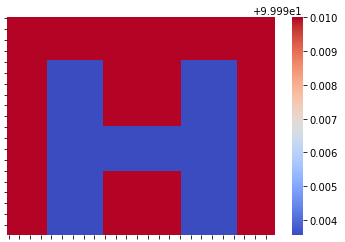

In [2]:
g = sns.heatmap(T, cmap='coolwarm');
g.set(yticklabels=[])
g.set(xticklabels=[])
plt.savefig('simulation_copper_heating.png')

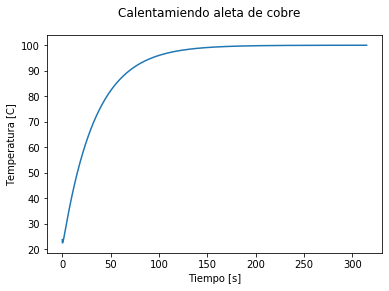

In [3]:

plt.figure().suptitle('Calentamiendo aleta de cobre')
plt.plot(time_C_H, Temp_C_H)
plt.xlabel('Tiempo [s]')
plt.ylabel('Temperatura [C]')
plt.savefig('Temp_vs_time_copper_heating.png')

## Enfriamiento de aleta de cobre

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

T = np.zeros((100,100))
T.fill(20)

T_inf = 20
k = 401 #W/mK
rho = 8933 #kg/m3
Cp = 385 #J/kgk
l = 0.001 #m
dt = 0.0021#s
alpha = k/(rho*Cp)
tau = alpha*dt/(l**2)
h = 25 #W/m2K
Bi = h*l/k

#Condiciones iniciales 100C
for i in range(20,100):
    for j in range(15,36):
        T[i, j] = 100
for i in range(50,70):
    for j in range(35,66):
        T[i, j] = 100
for i in range(20,100):
    for j in range(65,86):
        T[i, j] = 100

it = int(150000)   
time_C_C = np.zeros(it)
Temp_C_C = np.zeros(it)

for t in range(it):
    
    mean = np.mean(T[50:71 , 36:65])
    time_C_C[t] = t*dt
    Temp_C_C[t] = mean
    
    
    #Columna 1      
    for i in range(20,100):
        for j in range(15,36):
            #Nodo 1
            if i == 20 and j == 15:
                T[i,j] = T[i,j]*(1-tau*(4+6*Bi)) + 2*tau*(T[i,j+1] + T[i+1,j] + 3*Bi*T_inf)
            elif (i == 20 and j == 35):
                T[i,j] = T[i,j]*(1-tau*(4+6*Bi)) + 2*tau*(T[i,j-1] + T[i+1,j] + 3*Bi*T_inf)
            #Nodo 2
            elif i == 20 and (15 < j < 35):
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i+1,j] + 4*Bi*T_inf)
            elif 20 < i < 99 and j == 15:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i+1,j] + T[i-1,j] + 2*T[i,j+1] + 4*Bi*T_inf)
            elif (20 < i < 50 or 70 < i < 99) and j == 35:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i+1,j] + T[i-1,j] + 2*T[i,j-1] + 4*Bi*T_inf)
            #Nodo 3 izquierda
            elif i == 50 and j == 35:
                T[i,j] = T[i,j]*(1-tau*(4+10/3*Bi)) + tau/3*(4*T[i,j-1] + 2*T[i,j+1] + 4*T[i+1,j] + 2*T[i-1,j] + 10*Bi*T_inf)
            elif i == 70 and j == 35:
                T[i,j] = T[i,j]*(1-tau*(4+10/3*Bi)) + tau/3*(4*T[i,j-1] + 2*T[i,j+1] + 4*T[i-1,j] + 2*T[i+1,j] + 10*Bi*T_inf)
            #Nodo 4
            elif i == 99 and j == 15:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + 2*tau*(T[i,j+1] + T[i-1,j] + 2*Bi*T_inf)
            elif i == 99 and j == 35:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + 2*tau*(T[i,j-1] + T[i-1,j] + 2*Bi*T_inf)
            #Nodo 5
            elif i == 99 and (15 < j < 35):
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i-1,j] + 2*Bi*T_inf)
            #Nodo 6
            elif 20 < i < 99 and 15 < j < 35:
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j+1] + T[i,j-1] + T[i+1,j] + T[i-1,j] + 2*Bi*T_inf)
            elif 50 < i < 70 and j == 35:
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j+1] + T[i,j-1] + T[i+1,j] + T[i-1,j] + 2*Bi*T_inf)
            
    #Barra horizontal
    for i in range(50,71):
        for j in range(36,65):
            #Nodo 2
            if i == 50 and (36 <= j <= 64):
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i+1,j] + 4*Bi*T_inf)
            elif i == 70 and (36 <= j <= 64):
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i-1,j] + 4*Bi*T_inf)
            #Nodo 6
            else:
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j+1] + T[i,j-1] + T[i+1,j] + T[i-1,j] + 2*Bi*T_inf)

    #Columna 2
    for i in range(20,100):
        for j in range(65,86):
            #Nodo 1
            if (i == 20 and j == 65):
                T[i,j] = T[i,j]*(1-tau*(4+6*Bi)) + 2*tau*(T[i,j+1]+T[i+1,j]+3*Bi*T_inf)
            elif (i == 20 and j == 85):
                T[i,j] = T[i,j]*(1-tau*(4+6*Bi)) + 2*tau*(T[i,j-1]+T[i+1,j]+3*Bi*T_inf)
            #Nodo 2
            elif i == 20 and (65 < j < 85):
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i+1,j] + 4*Bi*T_inf)
            elif 20 < i < 99 and j == 85:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i+1,j] + T[i-1,j] + 2*T[i,j-1] + 4*Bi*T_inf)
            elif (20 < i < 50 or 70 < i < 99) and j == 65:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i+1,j] + T[i-1,j] + 2*T[i,j+1] + 4*Bi*T_inf)
            #Nodo 3 derecha
            elif i == 50 and j == 65:
                T[i,j] = T[i,j]*(1-tau*(4+10/3*Bi)) + tau/3*(4*T[i,j+1] + 2*T[i,j-1] + 4*T[i+1,j] + 2*T[i-1,j] + 10*Bi*T_inf)
            elif i == 70 and j == 65:
                T[i,j] = T[i,j]*(1-tau*(4+10/3*Bi)) + tau/3*(4*T[i,j+1] + 2*T[i,j-1] + 4*T[i-1,j] + 2*T[i+1,j] + 10*Bi*T_inf)
            #Nodo 4
            elif i == 99 and j == 65:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + 2*tau*(T[i,j+1] + T[i-1,j] + 2*Bi*T_inf)
            elif i == 99 and j == 85:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + 2*tau*(T[i,j-1] + T[i-1,j] + 2*Bi*T_inf)
            #Nodo 5
            elif i == 99 and (65 < j < 85):
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i-1,j] + 2*Bi*T_inf)
            #Nodo 6
            elif 20 < i < 99 and 65 < j < 85:
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j+1] + T[i,j-1] + T[i+1,j] + T[i-1,j] + 2*Bi*T_inf)
            elif 50 < i < 70 and j == 65:
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j+1] + T[i,j-1] + T[i+1,j] + T[i-1,j] + 2*Bi*T_inf)

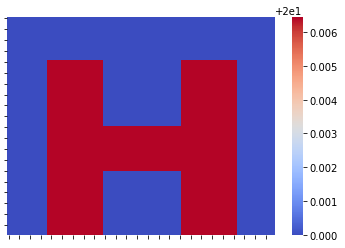

In [8]:
g = sns.heatmap(T, cmap='coolwarm');
g.set(yticklabels=[])
g.set(xticklabels=[])
plt.savefig('simulation_copper_cooling.png')

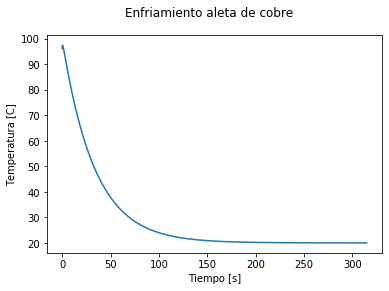

In [9]:
plt.figure().suptitle('Enfriamiento aleta de cobre')
plt.plot(time_C_C, Temp_C_C)
plt.xlabel('Tiempo [s]')
plt.ylabel('Temperatura [C]')
plt.savefig('Temp_vs_time_copper_cooling.png')

## Calentamiento aleta de aluminio

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

T = np.zeros((100,100))
T.fill(100)

T_inf = 100
k = 237 #W/mK
rho = 2702 #kg/m3
Cp = 903 #J/kgk
l = 0.001 #m
dt = 0.0021#s
alpha = k/(rho*Cp)
tau = alpha*dt/(l**2)
h = 25 #W/m2K
Bi = h*l/k

#Condiciones iniciales 100C
for i in range(20,100):
    for j in range(15,36):
        T[i, j] = 20
for i in range(50,70):
    for j in range(35,66):
        T[i, j] = 20
for i in range(20,100):
    for j in range(65,86):
        T[i, j] = 20

it = int(150000)   
time_A_H = np.zeros(it)
Temp_A_H = np.zeros(it)

for t in range(it):
    
    mean = np.mean(T[50:71 , 36:65])
    time_A_H[t] = t*dt
    Temp_A_H[t] = mean
    
    
    #Columna 1      
    for i in range(20,100):
        for j in range(15,36):
            #Nodo 1
            if i == 20 and j == 15:
                T[i,j] = T[i,j]*(1-tau*(4+6*Bi)) + 2*tau*(T[i,j+1] + T[i+1,j] + 3*Bi*T_inf)
            elif (i == 20 and j == 35):
                T[i,j] = T[i,j]*(1-tau*(4+6*Bi)) + 2*tau*(T[i,j-1] + T[i+1,j] + 3*Bi*T_inf)
            #Nodo 2
            elif i == 20 and (15 < j < 35):
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i+1,j] + 4*Bi*T_inf)
            elif 20 < i < 99 and j == 15:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i+1,j] + T[i-1,j] + 2*T[i,j+1] + 4*Bi*T_inf)
            elif (20 < i < 50 or 70 < i < 99) and j == 35:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i+1,j] + T[i-1,j] + 2*T[i,j-1] + 4*Bi*T_inf)
            #Nodo 3 izquierda
            elif i == 50 and j == 35:
                T[i,j] = T[i,j]*(1-tau*(4+10/3*Bi)) + tau/3*(4*T[i,j-1] + 2*T[i,j+1] + 4*T[i+1,j] + 2*T[i-1,j] + 10*Bi*T_inf)
            elif i == 70 and j == 35:
                T[i,j] = T[i,j]*(1-tau*(4+10/3*Bi)) + tau/3*(4*T[i,j-1] + 2*T[i,j+1] + 4*T[i-1,j] + 2*T[i+1,j] + 10*Bi*T_inf)
            #Nodo 4
            elif i == 99 and j == 15:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + 2*tau*(T[i,j+1] + T[i-1,j] + 2*Bi*T_inf)
            elif i == 99 and j == 35:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + 2*tau*(T[i,j-1] + T[i-1,j] + 2*Bi*T_inf)
            #Nodo 5
            elif i == 99 and (15 < j < 35):
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i-1,j] + 2*Bi*T_inf)
            #Nodo 6
            elif 20 < i < 99 and 15 < j < 35:
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j+1] + T[i,j-1] + T[i+1,j] + T[i-1,j] + 2*Bi*T_inf)
            elif 50 < i < 70 and j == 35:
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j+1] + T[i,j-1] + T[i+1,j] + T[i-1,j] + 2*Bi*T_inf)
            
    #Barra horizontal
    for i in range(50,71):
        for j in range(36,65):
            #Nodo 2
            if i == 50 and (36 <= j <= 64):
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i+1,j] + 4*Bi*T_inf)
            elif i == 70 and (36 <= j <= 64):
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i-1,j] + 4*Bi*T_inf)
            #Nodo 6
            else:
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j+1] + T[i,j-1] + T[i+1,j] + T[i-1,j] + 2*Bi*T_inf)

    #Columna 2
    for i in range(20,100):
        for j in range(65,86):
            #Nodo 1
            if (i == 20 and j == 65):
                T[i,j] = T[i,j]*(1-tau*(4+6*Bi)) + 2*tau*(T[i,j+1]+T[i+1,j]+3*Bi*T_inf)
            elif (i == 20 and j == 85):
                T[i,j] = T[i,j]*(1-tau*(4+6*Bi)) + 2*tau*(T[i,j-1]+T[i+1,j]+3*Bi*T_inf)
            #Nodo 2
            elif i == 20 and (65 < j < 85):
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i+1,j] + 4*Bi*T_inf)
            elif 20 < i < 99 and j == 85:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i+1,j] + T[i-1,j] + 2*T[i,j-1] + 4*Bi*T_inf)
            elif (20 < i < 50 or 70 < i < 99) and j == 65:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i+1,j] + T[i-1,j] + 2*T[i,j+1] + 4*Bi*T_inf)
            #Nodo 3 derecha
            elif i == 50 and j == 65:
                T[i,j] = T[i,j]*(1-tau*(4+10/3*Bi)) + tau/3*(4*T[i,j+1] + 2*T[i,j-1] + 4*T[i+1,j] + 2*T[i-1,j] + 10*Bi*T_inf)
            elif i == 70 and j == 65:
                T[i,j] = T[i,j]*(1-tau*(4+10/3*Bi)) + tau/3*(4*T[i,j+1] + 2*T[i,j-1] + 4*T[i-1,j] + 2*T[i+1,j] + 10*Bi*T_inf)
            #Nodo 4
            elif i == 99 and j == 65:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + 2*tau*(T[i,j+1] + T[i-1,j] + 2*Bi*T_inf)
            elif i == 99 and j == 85:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + 2*tau*(T[i,j-1] + T[i-1,j] + 2*Bi*T_inf)
            #Nodo 5
            elif i == 99 and (65 < j < 85):
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i-1,j] + 2*Bi*T_inf)
            #Nodo 6
            elif 20 < i < 99 and 65 < j < 85:
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j+1] + T[i,j-1] + T[i+1,j] + T[i-1,j] + 2*Bi*T_inf)
            elif 50 < i < 70 and j == 65:
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j+1] + T[i,j-1] + T[i+1,j] + T[i-1,j] + 2*Bi*T_inf)

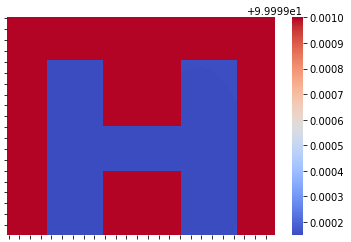

In [11]:
g = sns.heatmap(T, cmap='coolwarm');
g.set(yticklabels=[])
g.set(xticklabels=[])
plt.savefig('simulation_aluminum_heating.png')

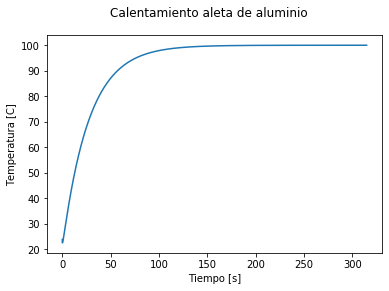

In [13]:
plt.figure().suptitle('Calentamiento aleta de aluminio')
plt.plot(time_A_H, Temp_A_H)
plt.xlabel('Tiempo [s]')
plt.ylabel('Temperatura [C]')
plt.savefig('Temp_vs_time_aluminum_heating.png')

## Enfriamiento aleta de aluminio

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

T = np.zeros((100,100))
T.fill(20)

T_inf = 20
k = 237 #W/mK
rho = 2702 #kg/m3
Cp = 903 #J/kgk
l = 0.001 #m
dt = 0.0021#s
alpha = k/(rho*Cp)
tau = alpha*dt/(l**2)
h = 25 #W/m2K
Bi = h*l/k

#Condiciones iniciales 100C
for i in range(20,100):
    for j in range(15,36):
        T[i, j] = 100
for i in range(50,70):
    for j in range(35,66):
        T[i, j] = 100
for i in range(20,100):
    for j in range(65,86):
        T[i, j] = 100

it = int(150000)   
time_A_C = np.zeros(it)
Temp_A_C = np.zeros(it)

for t in range(it):
    
    mean = np.mean(T[50:71 , 36:65])
    time_A_C[t] = t*dt
    Temp_A_C[t] = mean
    
    
    #Columna 1      
    for i in range(20,100):
        for j in range(15,36):
            #Nodo 1
            if i == 20 and j == 15:
                T[i,j] = T[i,j]*(1-tau*(4+6*Bi)) + 2*tau*(T[i,j+1] + T[i+1,j] + 3*Bi*T_inf)
            elif (i == 20 and j == 35):
                T[i,j] = T[i,j]*(1-tau*(4+6*Bi)) + 2*tau*(T[i,j-1] + T[i+1,j] + 3*Bi*T_inf)
            #Nodo 2
            elif i == 20 and (15 < j < 35):
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i+1,j] + 4*Bi*T_inf)
            elif 20 < i < 99 and j == 15:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i+1,j] + T[i-1,j] + 2*T[i,j+1] + 4*Bi*T_inf)
            elif (20 < i < 50 or 70 < i < 99) and j == 35:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i+1,j] + T[i-1,j] + 2*T[i,j-1] + 4*Bi*T_inf)
            #Nodo 3 izquierda
            elif i == 50 and j == 35:
                T[i,j] = T[i,j]*(1-tau*(4+10/3*Bi)) + tau/3*(4*T[i,j-1] + 2*T[i,j+1] + 4*T[i+1,j] + 2*T[i-1,j] + 10*Bi*T_inf)
            elif i == 70 and j == 35:
                T[i,j] = T[i,j]*(1-tau*(4+10/3*Bi)) + tau/3*(4*T[i,j-1] + 2*T[i,j+1] + 4*T[i-1,j] + 2*T[i+1,j] + 10*Bi*T_inf)
            #Nodo 4
            elif i == 99 and j == 15:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + 2*tau*(T[i,j+1] + T[i-1,j] + 2*Bi*T_inf)
            elif i == 99 and j == 35:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + 2*tau*(T[i,j-1] + T[i-1,j] + 2*Bi*T_inf)
            #Nodo 5
            elif i == 99 and (15 < j < 35):
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i-1,j] + 2*Bi*T_inf)
            #Nodo 6
            elif 20 < i < 99 and 15 < j < 35:
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j+1] + T[i,j-1] + T[i+1,j] + T[i-1,j] + 2*Bi*T_inf)
            elif 50 < i < 70 and j == 35:
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j+1] + T[i,j-1] + T[i+1,j] + T[i-1,j] + 2*Bi*T_inf)
            
    #Barra horizontal
    for i in range(50,71):
        for j in range(36,65):
            #Nodo 2
            if i == 50 and (36 <= j <= 64):
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i+1,j] + 4*Bi*T_inf)
            elif i == 70 and (36 <= j <= 64):
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i-1,j] + 4*Bi*T_inf)
            #Nodo 6
            else:
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j+1] + T[i,j-1] + T[i+1,j] + T[i-1,j] + 2*Bi*T_inf)

    #Columna 2
    for i in range(20,100):
        for j in range(65,86):
            #Nodo 1
            if (i == 20 and j == 65):
                T[i,j] = T[i,j]*(1-tau*(4+6*Bi)) + 2*tau*(T[i,j+1]+T[i+1,j]+3*Bi*T_inf)
            elif (i == 20 and j == 85):
                T[i,j] = T[i,j]*(1-tau*(4+6*Bi)) + 2*tau*(T[i,j-1]+T[i+1,j]+3*Bi*T_inf)
            #Nodo 2
            elif i == 20 and (65 < j < 85):
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i+1,j] + 4*Bi*T_inf)
            elif 20 < i < 99 and j == 85:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i+1,j] + T[i-1,j] + 2*T[i,j-1] + 4*Bi*T_inf)
            elif (20 < i < 50 or 70 < i < 99) and j == 65:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i+1,j] + T[i-1,j] + 2*T[i,j+1] + 4*Bi*T_inf)
            #Nodo 3 derecha
            elif i == 50 and j == 65:
                T[i,j] = T[i,j]*(1-tau*(4+10/3*Bi)) + tau/3*(4*T[i,j+1] + 2*T[i,j-1] + 4*T[i+1,j] + 2*T[i-1,j] + 10*Bi*T_inf)
            elif i == 70 and j == 65:
                T[i,j] = T[i,j]*(1-tau*(4+10/3*Bi)) + tau/3*(4*T[i,j+1] + 2*T[i,j-1] + 4*T[i-1,j] + 2*T[i+1,j] + 10*Bi*T_inf)
            #Nodo 4
            elif i == 99 and j == 65:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + 2*tau*(T[i,j+1] + T[i-1,j] + 2*Bi*T_inf)
            elif i == 99 and j == 85:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + 2*tau*(T[i,j-1] + T[i-1,j] + 2*Bi*T_inf)
            #Nodo 5
            elif i == 99 and (65 < j < 85):
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i-1,j] + 2*Bi*T_inf)
            #Nodo 6
            elif 20 < i < 99 and 65 < j < 85:
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j+1] + T[i,j-1] + T[i+1,j] + T[i-1,j] + 2*Bi*T_inf)
            elif 50 < i < 70 and j == 65:
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j+1] + T[i,j-1] + T[i+1,j] + T[i-1,j] + 2*Bi*T_inf)

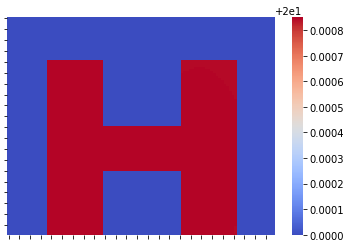

In [15]:
g = sns.heatmap(T, cmap='coolwarm');
g.set(yticklabels=[])
g.set(xticklabels=[])
plt.savefig('simulation_aluminum_cooling.png')

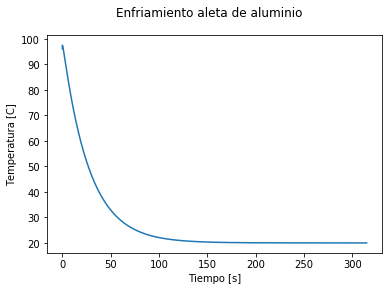

In [16]:
plt.figure().suptitle('Enfriamiento aleta de aluminio')
plt.plot(time_A_C, Temp_A_C)
plt.xlabel('Tiempo [s]')
plt.ylabel('Temperatura [C]')
plt.savefig('Temp_vs_time_aluminum_cooling.png')

## Calentamiento aleta de acero

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

T = np.zeros((100,100))
T.fill(100)

T_inf = 100
k = 63.9 #W/mK
rho = 7832 #kg/m3
Cp = 434 #J/kgk
l = 0.001 #m
dt = 0.0021#s
alpha = k/(rho*Cp)
tau = alpha*dt/(l**2)
h = 25 #W/m2K
Bi = h*l/k

#Condiciones iniciales 100C
for i in range(20,100):
    for j in range(15,36):
        T[i, j] = 20
for i in range(50,70):
    for j in range(35,66):
        T[i, j] = 20
for i in range(20,100):
    for j in range(65,86):
        T[i, j] = 20

it = int(150000)   
time_S_H = np.zeros(it)
Temp_S_H = np.zeros(it)

for t in range(it):
    
    mean = np.mean(T[50:71 , 36:65])
    time_S_H[t] = t*dt
    Temp_S_H[t] = mean
    
    
    #Columna 1      
    for i in range(20,100):
        for j in range(15,36):
            #Nodo 1
            if i == 20 and j == 15:
                T[i,j] = T[i,j]*(1-tau*(4+6*Bi)) + 2*tau*(T[i,j+1] + T[i+1,j] + 3*Bi*T_inf)
            elif (i == 20 and j == 35):
                T[i,j] = T[i,j]*(1-tau*(4+6*Bi)) + 2*tau*(T[i,j-1] + T[i+1,j] + 3*Bi*T_inf)
            #Nodo 2
            elif i == 20 and (15 < j < 35):
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i+1,j] + 4*Bi*T_inf)
            elif 20 < i < 99 and j == 15:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i+1,j] + T[i-1,j] + 2*T[i,j+1] + 4*Bi*T_inf)
            elif (20 < i < 50 or 70 < i < 99) and j == 35:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i+1,j] + T[i-1,j] + 2*T[i,j-1] + 4*Bi*T_inf)
            #Nodo 3 izquierda
            elif i == 50 and j == 35:
                T[i,j] = T[i,j]*(1-tau*(4+10/3*Bi)) + tau/3*(4*T[i,j-1] + 2*T[i,j+1] + 4*T[i+1,j] + 2*T[i-1,j] + 10*Bi*T_inf)
            elif i == 70 and j == 35:
                T[i,j] = T[i,j]*(1-tau*(4+10/3*Bi)) + tau/3*(4*T[i,j-1] + 2*T[i,j+1] + 4*T[i-1,j] + 2*T[i+1,j] + 10*Bi*T_inf)
            #Nodo 4
            elif i == 99 and j == 15:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + 2*tau*(T[i,j+1] + T[i-1,j] + 2*Bi*T_inf)
            elif i == 99 and j == 35:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + 2*tau*(T[i,j-1] + T[i-1,j] + 2*Bi*T_inf)
            #Nodo 5
            elif i == 99 and (15 < j < 35):
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i-1,j] + 2*Bi*T_inf)
            #Nodo 6
            elif 20 < i < 99 and 15 < j < 35:
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j+1] + T[i,j-1] + T[i+1,j] + T[i-1,j] + 2*Bi*T_inf)
            elif 50 < i < 70 and j == 35:
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j+1] + T[i,j-1] + T[i+1,j] + T[i-1,j] + 2*Bi*T_inf)
            
    #Barra horizontal
    for i in range(50,71):
        for j in range(36,65):
            #Nodo 2
            if i == 50 and (36 <= j <= 64):
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i+1,j] + 4*Bi*T_inf)
            elif i == 70 and (36 <= j <= 64):
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i-1,j] + 4*Bi*T_inf)
            #Nodo 6
            else:
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j+1] + T[i,j-1] + T[i+1,j] + T[i-1,j] + 2*Bi*T_inf)

    #Columna 2
    for i in range(20,100):
        for j in range(65,86):
            #Nodo 1
            if (i == 20 and j == 65):
                T[i,j] = T[i,j]*(1-tau*(4+6*Bi)) + 2*tau*(T[i,j+1]+T[i+1,j]+3*Bi*T_inf)
            elif (i == 20 and j == 85):
                T[i,j] = T[i,j]*(1-tau*(4+6*Bi)) + 2*tau*(T[i,j-1]+T[i+1,j]+3*Bi*T_inf)
            #Nodo 2
            elif i == 20 and (65 < j < 85):
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i+1,j] + 4*Bi*T_inf)
            elif 20 < i < 99 and j == 85:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i+1,j] + T[i-1,j] + 2*T[i,j-1] + 4*Bi*T_inf)
            elif (20 < i < 50 or 70 < i < 99) and j == 65:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i+1,j] + T[i-1,j] + 2*T[i,j+1] + 4*Bi*T_inf)
            #Nodo 3 derecha
            elif i == 50 and j == 65:
                T[i,j] = T[i,j]*(1-tau*(4+10/3*Bi)) + tau/3*(4*T[i,j+1] + 2*T[i,j-1] + 4*T[i+1,j] + 2*T[i-1,j] + 10*Bi*T_inf)
            elif i == 70 and j == 65:
                T[i,j] = T[i,j]*(1-tau*(4+10/3*Bi)) + tau/3*(4*T[i,j+1] + 2*T[i,j-1] + 4*T[i-1,j] + 2*T[i+1,j] + 10*Bi*T_inf)
            #Nodo 4
            elif i == 99 and j == 65:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + 2*tau*(T[i,j+1] + T[i-1,j] + 2*Bi*T_inf)
            elif i == 99 and j == 85:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + 2*tau*(T[i,j-1] + T[i-1,j] + 2*Bi*T_inf)
            #Nodo 5
            elif i == 99 and (65 < j < 85):
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i-1,j] + 2*Bi*T_inf)
            #Nodo 6
            elif 20 < i < 99 and 65 < j < 85:
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j+1] + T[i,j-1] + T[i+1,j] + T[i-1,j] + 2*Bi*T_inf)
            elif 50 < i < 70 and j == 65:
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j+1] + T[i,j-1] + T[i+1,j] + T[i-1,j] + 2*Bi*T_inf)

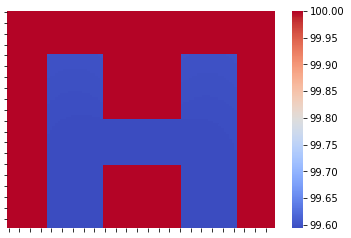

In [18]:
g = sns.heatmap(T, cmap='coolwarm');
g.set(yticklabels=[])
g.set(xticklabels=[])
plt.savefig('simulation_steel_heating.png')

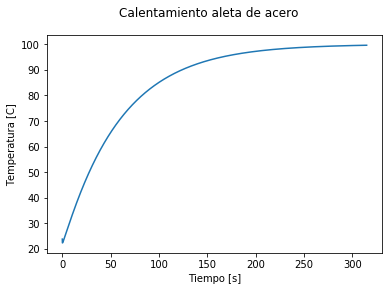

In [19]:
plt.figure().suptitle('Calentamiento aleta de acero')
plt.plot(time_S_H, Temp_S_H)
plt.xlabel('Tiempo [s]')
plt.ylabel('Temperatura [C]')
plt.savefig('Temp_vs_time_steel_heating.png')

## Enfriamiento de aleta de acero

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

T = np.zeros((100,100))
T.fill(20)

T_inf = 20
k = 63.9 #W/mK
rho = 7832 #kg/m3
Cp = 434 #J/kgk
l = 0.001 #m
dt = 0.0021#s
alpha = k/(rho*Cp)
tau = alpha*dt/(l**2)
h = 25 #W/m2K
Bi = h*l/k

#Condiciones iniciales 100C
for i in range(20,100):
    for j in range(15,36):
        T[i, j] = 100
for i in range(50,70):
    for j in range(35,66):
        T[i, j] = 100
for i in range(20,100):
    for j in range(65,86):
        T[i, j] = 100

it = int(150000)   
time_S_C = np.zeros(it)
Temp_S_C = np.zeros(it)

for t in range(it):
    
    mean = np.mean(T[50:71 , 36:65])
    time_S_C[t] = t*dt
    Temp_S_C[t] = mean
    
    
    #Columna 1      
    for i in range(20,100):
        for j in range(15,36):
            #Nodo 1
            if i == 20 and j == 15:
                T[i,j] = T[i,j]*(1-tau*(4+6*Bi)) + 2*tau*(T[i,j+1] + T[i+1,j] + 3*Bi*T_inf)
            elif (i == 20 and j == 35):
                T[i,j] = T[i,j]*(1-tau*(4+6*Bi)) + 2*tau*(T[i,j-1] + T[i+1,j] + 3*Bi*T_inf)
            #Nodo 2
            elif i == 20 and (15 < j < 35):
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i+1,j] + 4*Bi*T_inf)
            elif 20 < i < 99 and j == 15:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i+1,j] + T[i-1,j] + 2*T[i,j+1] + 4*Bi*T_inf)
            elif (20 < i < 50 or 70 < i < 99) and j == 35:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i+1,j] + T[i-1,j] + 2*T[i,j-1] + 4*Bi*T_inf)
            #Nodo 3 izquierda
            elif i == 50 and j == 35:
                T[i,j] = T[i,j]*(1-tau*(4+10/3*Bi)) + tau/3*(4*T[i,j-1] + 2*T[i,j+1] + 4*T[i+1,j] + 2*T[i-1,j] + 10*Bi*T_inf)
            elif i == 70 and j == 35:
                T[i,j] = T[i,j]*(1-tau*(4+10/3*Bi)) + tau/3*(4*T[i,j-1] + 2*T[i,j+1] + 4*T[i-1,j] + 2*T[i+1,j] + 10*Bi*T_inf)
            #Nodo 4
            elif i == 99 and j == 15:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + 2*tau*(T[i,j+1] + T[i-1,j] + 2*Bi*T_inf)
            elif i == 99 and j == 35:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + 2*tau*(T[i,j-1] + T[i-1,j] + 2*Bi*T_inf)
            #Nodo 5
            elif i == 99 and (15 < j < 35):
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i-1,j] + 2*Bi*T_inf)
            #Nodo 6
            elif 20 < i < 99 and 15 < j < 35:
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j+1] + T[i,j-1] + T[i+1,j] + T[i-1,j] + 2*Bi*T_inf)
            elif 50 < i < 70 and j == 35:
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j+1] + T[i,j-1] + T[i+1,j] + T[i-1,j] + 2*Bi*T_inf)
            
    #Barra horizontal
    for i in range(50,71):
        for j in range(36,65):
            #Nodo 2
            if i == 50 and (36 <= j <= 64):
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i+1,j] + 4*Bi*T_inf)
            elif i == 70 and (36 <= j <= 64):
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i-1,j] + 4*Bi*T_inf)
            #Nodo 6
            else:
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j+1] + T[i,j-1] + T[i+1,j] + T[i-1,j] + 2*Bi*T_inf)

    #Columna 2
    for i in range(20,100):
        for j in range(65,86):
            #Nodo 1
            if (i == 20 and j == 65):
                T[i,j] = T[i,j]*(1-tau*(4+6*Bi)) + 2*tau*(T[i,j+1]+T[i+1,j]+3*Bi*T_inf)
            elif (i == 20 and j == 85):
                T[i,j] = T[i,j]*(1-tau*(4+6*Bi)) + 2*tau*(T[i,j-1]+T[i+1,j]+3*Bi*T_inf)
            #Nodo 2
            elif i == 20 and (65 < j < 85):
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i+1,j] + 4*Bi*T_inf)
            elif 20 < i < 99 and j == 85:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i+1,j] + T[i-1,j] + 2*T[i,j-1] + 4*Bi*T_inf)
            elif (20 < i < 50 or 70 < i < 99) and j == 65:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i+1,j] + T[i-1,j] + 2*T[i,j+1] + 4*Bi*T_inf)
            #Nodo 3 derecha
            elif i == 50 and j == 65:
                T[i,j] = T[i,j]*(1-tau*(4+10/3*Bi)) + tau/3*(4*T[i,j+1] + 2*T[i,j-1] + 4*T[i+1,j] + 2*T[i-1,j] + 10*Bi*T_inf)
            elif i == 70 and j == 65:
                T[i,j] = T[i,j]*(1-tau*(4+10/3*Bi)) + tau/3*(4*T[i,j+1] + 2*T[i,j-1] + 4*T[i-1,j] + 2*T[i+1,j] + 10*Bi*T_inf)
            #Nodo 4
            elif i == 99 and j == 65:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + 2*tau*(T[i,j+1] + T[i-1,j] + 2*Bi*T_inf)
            elif i == 99 and j == 85:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + 2*tau*(T[i,j-1] + T[i-1,j] + 2*Bi*T_inf)
            #Nodo 5
            elif i == 99 and (65 < j < 85):
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i-1,j] + 2*Bi*T_inf)
            #Nodo 6
            elif 20 < i < 99 and 65 < j < 85:
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j+1] + T[i,j-1] + T[i+1,j] + T[i-1,j] + 2*Bi*T_inf)
            elif 50 < i < 70 and j == 65:
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j+1] + T[i,j-1] + T[i+1,j] + T[i-1,j] + 2*Bi*T_inf)

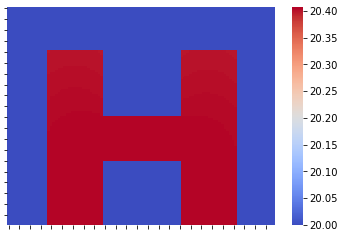

In [23]:
g = sns.heatmap(T, cmap='coolwarm');
g.set(yticklabels=[])
g.set(xticklabels=[])
plt.savefig('simulation_steel_cooling.png')

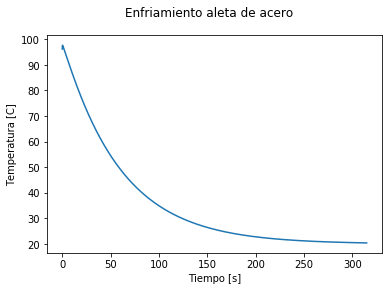

In [24]:
plt.figure().suptitle('Enfriamiento aleta de acero')
plt.plot(time_S_C, Temp_S_C)
plt.xlabel('Tiempo [s]')
plt.ylabel('Temperatura [C]')
plt.savefig('Temp_vs_time_steel_cooling.png')

C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  
C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


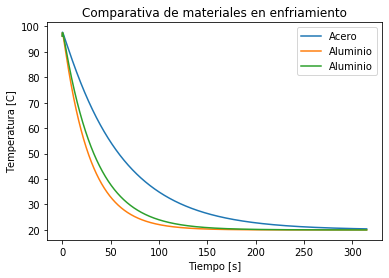

In [33]:
plt.plot(time_S_C, Temp_S_C, label = "Acero")
plt.plot(time_A_C, Temp_A_C, label = "Aluminio")
plt.plot(time_C_C, Temp_C_C, label = "Aluminio")
plt.xlabel('Tiempo [s]')
plt.ylabel('Temperatura [C]')
plt.title('Comparativa de materiales en enfriamiento')
plt.legend()
plt.savefig('comparative_cooling.png')
plt.show()


C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  
C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


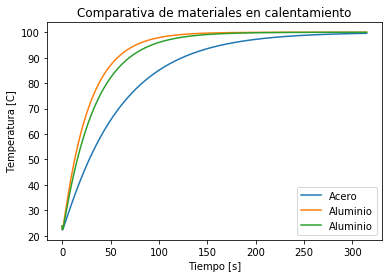

In [34]:
plt.plot(time_S_H, Temp_S_H, label = "Acero")
plt.plot(time_A_H, Temp_A_H, label = "Aluminio")
plt.plot(time_C_H, Temp_C_H, label = "Aluminio")
plt.xlabel('Tiempo [s]')
plt.ylabel('Temperatura [C]')
plt.title('Comparativa de materiales en calentamiento')
plt.legend()
plt.savefig('comparative_heating.png')
plt.show()
